## Decision Tree - Classification

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [50]:
df = pd.read_csv("penguins_size.csv")  #penguen cesidi, yasadigi ada,gaga uzunlugu,gaga genisligi, kanat uzunlugu,vücut indexsi,cinsiyeti
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [52]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [53]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [54]:
10/344  #344 gözlem 10 missing value var oranladik

0.029069767441860465

In [55]:
df.dropna(inplace=True)

In [56]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [58]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [59]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [60]:
df[df["sex"]== "."]     #336 nin cinsiyeti belli degil düsürdük

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [61]:
df.drop(index=336, inplace=True)

In [62]:
df2 = df.copy()

## Visualization

In [63]:
df["species"].value_counts()  #cinslere bakinca sayilar arasi bir dengesizlik oldugunu gördük

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

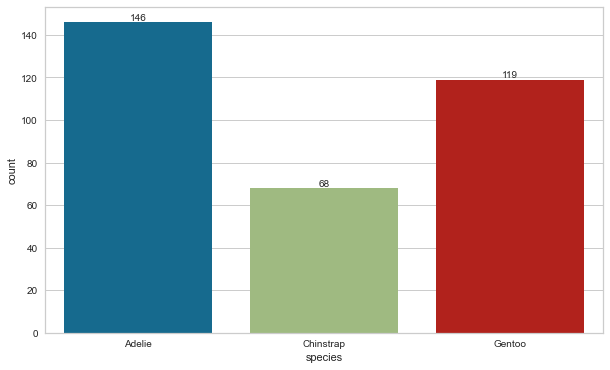

In [64]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0]);

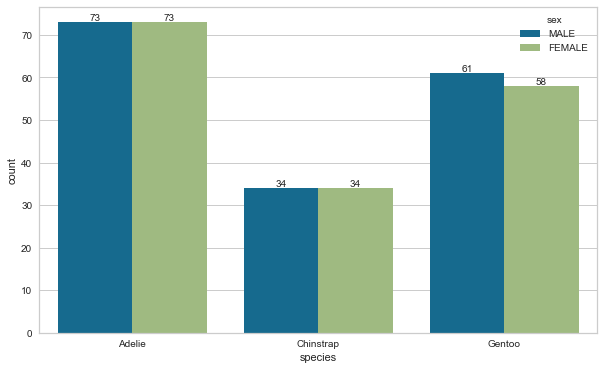

In [65]:
ax = sns.countplot(x="species", hue="sex", data = df)
for p in ax.containers:
    ax.bar_label(p)

<Figure size 864x432 with 0 Axes>

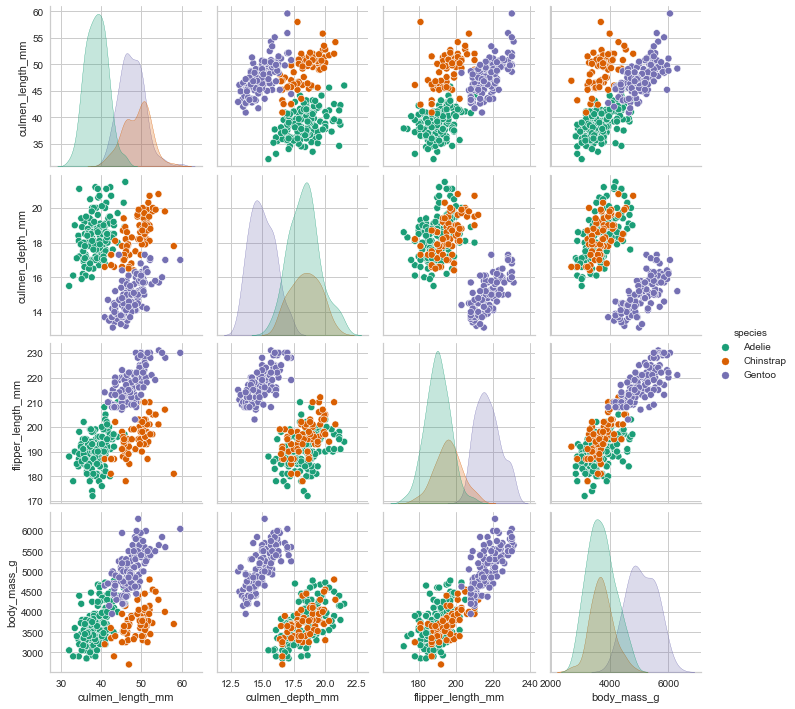

In [66]:
plt.figure(figsize=(12,6))    #gaga uzunlugu, gaga genisligi, palet ya da kanat uzunlugu
sns.pairplot(df,hue='species',palette='Dark2')

In [67]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [68]:
# !pip install plotly

In [69]:
import plotly.express as px

In [70]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

## Correlation beetwen numeric features

In [71]:
df.select_dtypes("number")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [72]:
df.select_dtypes("number").corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


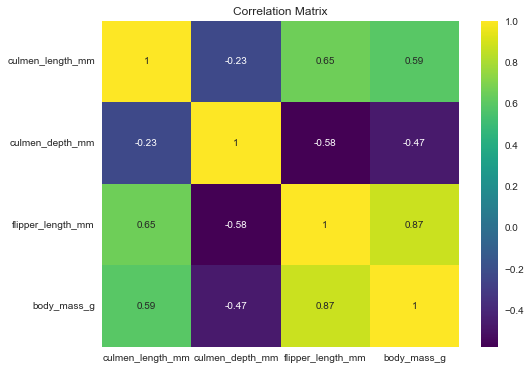

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

In [74]:
##nonparametriklerde multicorr sorun degil

## Train | Test Split

In [75]:
X = df2.drop(columns="species")
y = df2['species']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=101)

## OrdinalEncoder and Categoric Variable

In [78]:
##treebase modellerde dummies de kullanilabilir  ama bir feature importance yapacaksak ordinalencoder kullanmaliyiz 
#hem daha hizli calisir (2.5 kat), hem düzgün bir feature importance elde edilir,daha iyi skorlar alinir hem de hesaplama maliyeti azalir
#SVM,KNN de featurelerin birbirine karsi üstünlügü varsa ordinalencoder kullanilir
#dummies pandasin, encoding sklearn kütüphanesinin

In [79]:
cat = X_train.select_dtypes("object").columns #kategorik verileri buluyoruz
cat

Index(['island', 'sex'], dtype='object')

In [80]:
X_train[cat]

,island,sex
285,Biscoe,MALE
183,Dream,MALE
211,Dream,FEMALE
193,Dream,FEMALE
134,Dream,FEMALE
...,...,...
108,Biscoe,FEMALE
1,Torgersen,FEMALE
53,Biscoe,MALE
67,Biscoe,MALE


In [81]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()   #train setinin kategorik featurelerini egittik encoding yaptik
enc.fit_transform(X_train[cat])    #0=Biscoe,1=Dream,2=Torgersen, alfabetik siralayip index numarasi veriyor

array([[0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [2., 0.],
       [1., 1.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [2., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [2., 1.],
       [2., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [2., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.

In [82]:
X_train[cat] = enc.fit_transform(X_train[cat])
X_train[cat]

,island,sex
285,0.0,1.0
183,1.0,1.0
211,1.0,0.0
193,1.0,0.0
134,1.0,0.0
...,...,...
108,0.0,0.0
1,2.0,0.0
53,0.0,1.0
67,0.0,1.0


In [83]:
X_train.head()  #hepsi numeric oldu

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
285,0.0,49.8,16.8,230.0,5700.0,1.0
183,1.0,54.2,20.8,201.0,4300.0,1.0
211,1.0,45.6,19.4,194.0,3525.0,0.0
193,1.0,46.2,17.5,187.0,3650.0,0.0
134,1.0,38.1,17.6,187.0,3425.0,0.0


In [84]:
X_test[cat] = enc.transform(X_test[cat])  #testtekilere de dönüsüm uyguluyoruz ama train e göre yap diyoruz,egitim yapilmiyor sadece test yapiliyor
X_test[cat]

,island,sex
89,1.0,0.0
143,1.0,1.0
335,0.0,1.0
256,0.0,0.0
252,0.0,0.0
...,...,...
280,0.0,0.0
153,1.0,1.0
195,1.0,0.0
334,0.0,0.0


In [85]:
X_test.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
89,1.0,38.9,18.8,190.0,3600.0,0.0
143,1.0,40.7,17.0,190.0,3725.0,1.0
335,0.0,55.1,16.0,230.0,5850.0,1.0
256,0.0,42.6,13.7,213.0,4950.0,0.0
252,0.0,45.1,14.5,207.0,5050.0,0.0


## Modeling with Pipeline

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [87]:
X_train.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
314,Biscoe,44.5,14.7,214.0,4850.0,FEMALE
248,Biscoe,48.2,14.3,210.0,4600.0,FEMALE


In [88]:
X_test.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
171,Dream,49.2,18.2,195.0,4400.0,MALE
250,Biscoe,47.3,15.3,222.0,5250.0,MALE


In [89]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  #bilinmeyene -1 ata dedik,numeric numaralarla cakismasin diye -1 verdik

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough') #remainder a bir scale yapilmayacak diye passthrough diyorum
 #test setinde olup da train setinde olmayan veri varsa diye unknown kullaniliyor
 #tree base model scale gerektirmez

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
# önce ordinalencoder uygulayacak
pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

## Model Performance on Classification Tasks

In [91]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [92]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

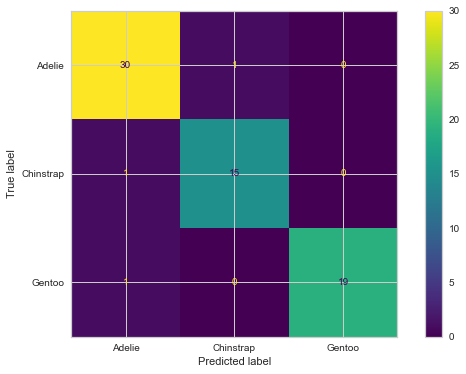

In [93]:
plot_confusion_matrix(pipe_model,X_test,y_test)

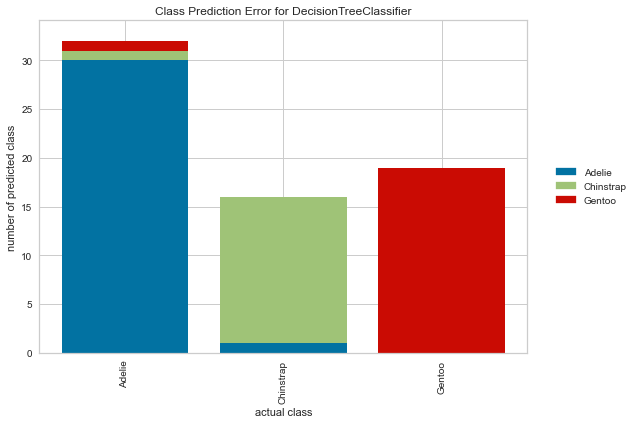

In [94]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [95]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]
              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [ ]:
#hepsi dengeliyse micro ya da accuracy skor kullanilabilir

## Cross Validate

In [96]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [97]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)  #modeli sifirladik


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True) #over fitting durumu icin return_train_score u aldim
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
#cross validation ile pipe line i kullanmak gerek

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro,test_f1_micro,train_f1_micro
1,0.007173,0.009521,0.925926,1.0,0.925926,1.0,0.925926,1.0,0.925926,1.0
2,0.005656,0.006786,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
3,0.006645,0.006515,0.888889,1.0,0.888889,1.0,0.888889,1.0,0.888889,1.0
4,0.005000,0.005977,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
5,0.005083,0.005923,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
6,0.006038,0.006999,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
7,0.007766,0.017005,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
8,0.010998,0.007001,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
9,0.005001,0.006166,0.961538,1.0,0.961538,1.0,0.961538,1.0,0.961538,1.0
10,0.004512,0.006001,0.961538,1.0,0.961538,1.0,0.961538,1.0,0.961538,1.0


In [98]:
df_scores.mean()[2:]

test_accuracy            0.973789
train_accuracy           1.000000
test_precision_micro     0.973789
train_precision_micro    1.000000
test_recall_micro        0.973789
train_recall_micro       1.000000
test_f1_micro            0.973789
train_f1_micro           1.000000
dtype: float64

## Evaluating ROC Curves and AUC

In [ ]:
#modelim dengeli oldugu icin ROC and AUC e bakiyorum

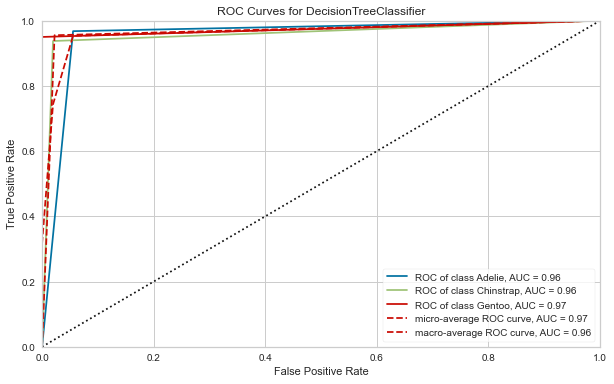

In [99]:
from yellowbrick.classifier import ROCAUC

model = pipe_model

visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

In [100]:
column_trans.get_feature_names_out()

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

## Feature İmportances with Pipeline

https://github.com/scikit-learn/scikit-learn/issues/21304

In [103]:
cat

Index(['island', 'sex'], dtype='object')

In [ ]:
#en iyi hyper parametrelerle feature importance yapmaliyiz
#burada skorlar cok iyi diye en iyi hyper parametreleri bulmadik

In [101]:
pipe_model["DT_model"].feature_importances_ # DT_model.feature_importances_
#burada her bir feature nin tahmine yüzde kac katkisi var onu bulduk, bunlarin toplami 1 dir


array([0.03327601, 0.02363079, 0.35128085, 0.04724943, 0.54456291,
       0.        ])

In [102]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features
#dönüsüme ugradiktan sonra column transform nasil featureler elde etti, ordinalencoder ve remainder ile neler yapilmis asagidaki ciktidan görülüyor

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [ ]:
#column transform ile dönüsüm islemi yaptiktan sonra siralama degisti
#kategorikler numerik e cevrildi ama bunlari basa aldi;island ve sex i
#degisiklik yapilanlarin basina ordinalencoder,degismeyenlerin basina remainder geliyor

In [104]:
X_train.head(1)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
314,Biscoe,44.5,14.7,214.0,4850.0,FEMALE


In [105]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=features).head()

,ordinalencoder__island,ordinalencoder__sex,remainder__culmen_length_mm,remainder__culmen_depth_mm,remainder__flipper_length_mm,remainder__body_mass_g
0,0.0,0.0,44.5,14.7,214.0,4850.0
1,0.0,0.0,48.2,14.3,210.0,4600.0
2,1.0,1.0,49.0,19.6,212.0,4300.0
3,1.0,0.0,40.9,16.6,187.0,3200.0
4,0.0,0.0,46.2,14.5,209.0,4800.0


In [106]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [107]:
df_f_i = pd.DataFrame(data = pipe_model["DT_model"].feature_importances_, index=new_features, #index=X.columns
                                                                                    #pipe line kullandik new_features i kullanmak zorundayiz
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
flipper_length_mm,0.544563
culmen_length_mm,0.351281
culmen_depth_mm,0.047249
island,0.033276
sex,0.023631
body_mass_g,0.000000


In [ ]:
#en önemli featurem kanat uzunluguymus

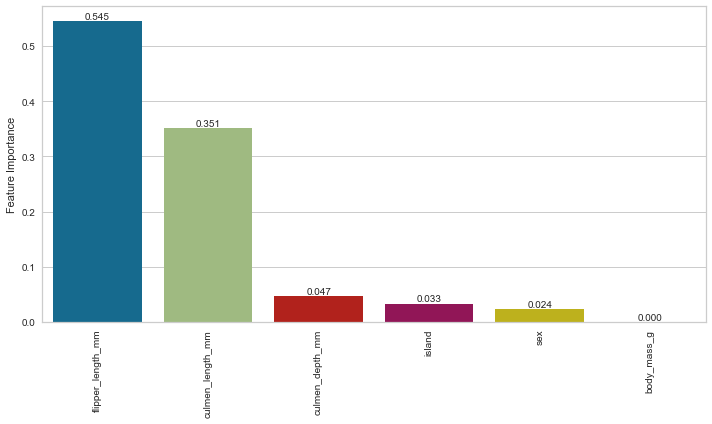

In [108]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
#bir feature daha güclüyse onu datadan düsürüp tekrar bakmak gerek,bunlar over fitting e sebep olabilir,test seti daha da iyilesecektir
#ama bu bazi datalari kötülestirebilir bazilarini daha da iyilestirir

## Drop most important feature

In [109]:
X.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [110]:
X2 = X.drop(columns = ["flipper_length_mm"])  #en önemli featureyi düsürdüm

In [111]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

In [112]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

In [113]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2)
#hata yukarida 3 iken simdi 1 e düstü

Test_Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [114]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
#feature düstükten sonraki modele cross validation yaptik

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro,test_f1_micro,train_f1_micro
1,0.005683,0.008070,0.962963,1.0,0.962963,1.0,0.962963,1.0,0.962963,1.0
2,0.005997,0.006003,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
3,0.005436,0.006002,0.925926,1.0,0.925926,1.0,0.925926,1.0,0.925926,1.0
4,0.005006,0.006000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
5,0.005003,0.005002,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
6,0.006001,0.005001,0.962963,1.0,0.962963,1.0,0.962963,1.0,0.962963,1.0
7,0.005001,0.005731,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
8,0.006016,0.005553,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
9,0.004183,0.008857,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
10,0.006660,0.004353,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0


In [115]:
df_scores.mean()[2:]

test_accuracy            0.985185
train_accuracy           1.000000
test_precision_micro     0.985185
train_precision_micro    1.000000
test_recall_micro        0.985185
train_recall_micro       1.000000
test_f1_micro            0.985185
train_f1_micro           1.000000
dtype: float64

## Adelie-Chinstrap weighted metric Scores

In [116]:
from sklearn.metrics import make_scorer

In [117]:
scoring = {'precision-Adelie-Chinstrap': make_scorer(precision_score,  average="weighted", labels=["Adelie", "Chinstrap"]),
           'recall-Adelie-Chinstrap': make_scorer(recall_score, average="weighted", labels =["Adelie", "Chinstrap"]),
           'f1-Adelie-Chinstrap': make_scorer(f1_score, average="weighted", labels = ["Adelie", "Chinstrap"])
          
          }
          #müsteri özellikle bazi featurelere bakilsin isteyebilir

In [118]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie-Chinstrap     0.981303
train_precision-Adelie-Chinstrap    1.000000
test_recall-Adelie-Chinstrap        0.982353
train_recall-Adelie-Chinstrap       1.000000
test_f1-Adelie-Chinstrap            0.979985
train_f1-Adelie-Chinstrap           1.000000
dtype: float64

In [ ]:
#agirliklandirilmis skorlar birbirine yakin cikti

## Visualize the Tree

In [119]:
from sklearn.tree import plot_tree

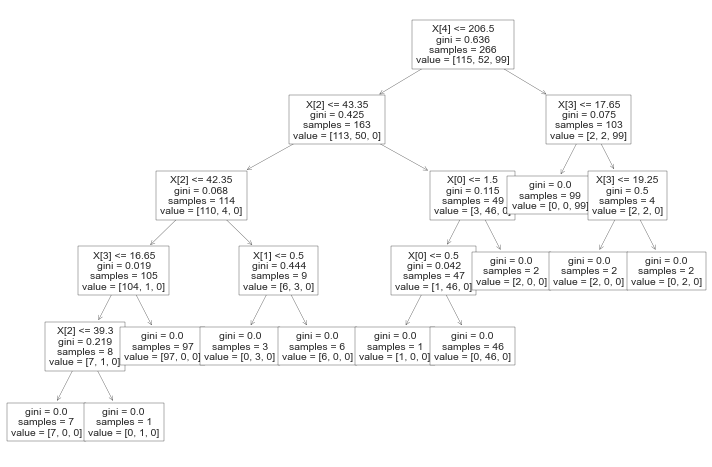

In [120]:
plt.figure(figsize=(12,8), dpi=75)
plot_tree(pipe_model["DT_model"], fontsize=10);

In [121]:
X.columns

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [122]:
new_features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [125]:
pd.set_option('display.max_rows', 500)
X_train.flipper_length_mm.sort_values().unique()

array([172., 176., 178., 180., 181., 182., 183., 184., 185., 186., 187.,
       188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198.,
       199., 200., 201., 202., 203., 205., 206., 207., 208., 209., 210.,
       211., 212., 213., 214., 215., 216., 217., 218., 219., 220., 221.,
       222., 223., 224., 225., 228., 229., 230., 231.])

In [124]:
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
314,Biscoe,44.5,14.7,214.0,4850.0,FEMALE
248,Biscoe,48.2,14.3,210.0,4600.0,FEMALE
199,Dream,49.0,19.6,212.0,4300.0,MALE
182,Dream,40.9,16.6,187.0,3200.0,FEMALE
238,Biscoe,46.2,14.5,209.0,4800.0,FEMALE
...,...,...,...,...,...,...
81,Torgersen,42.9,17.6,196.0,4700.0,MALE
93,Dream,39.6,18.1,186.0,4450.0,MALE
69,Torgersen,41.8,19.4,198.0,4450.0,MALE
335,Biscoe,55.1,16.0,230.0,5850.0,MALE


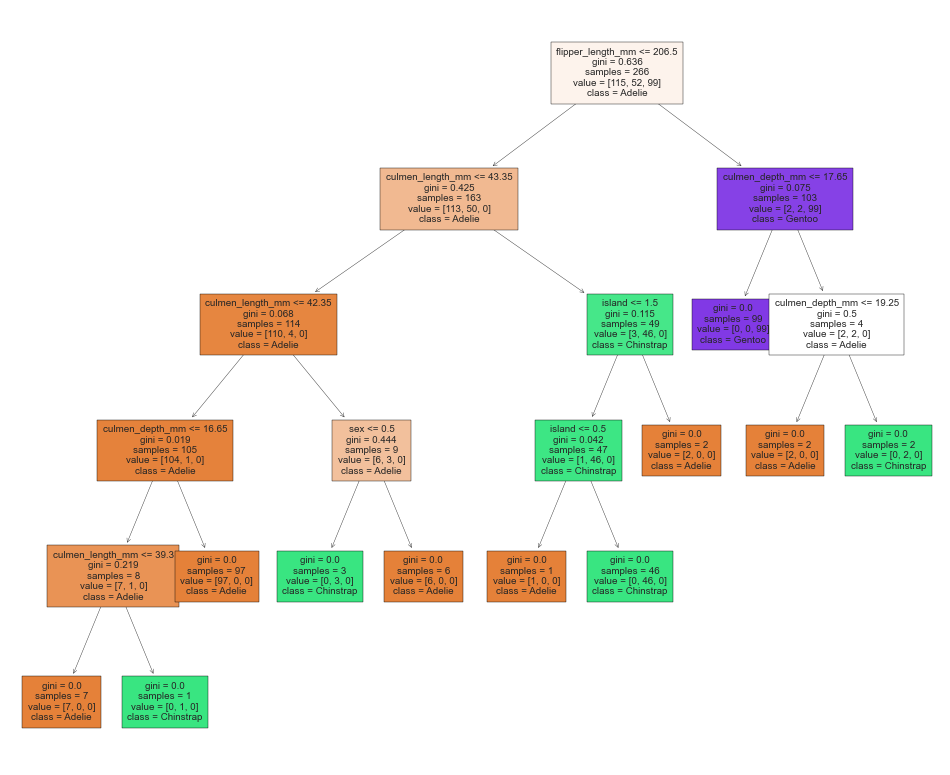

In [123]:
plt.figure(figsize=(12,10),dpi=100)
plot_tree(pipe_model["DT_model"], filled=True, feature_names=new_features, class_names= y.unique(), fontsize=7);
#feature isimlerini benim verdiklerime göre doldur diyorum
#gini impurity degeri en düsük olani aliyor , en üstteki root node
#hepsi tek yapraga düsene kadar gider

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf

In [126]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"], filled=True, feature_names=new_features, class_names = y.unique(), fontsize=10);
    #feature_names=X.columns

In [127]:
DT_model = DecisionTreeClassifier(max_depth=2, random_state=101) #max depth 2 diyince 2 tane dallanma yapiyor, train setine hata yüklüyor
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]  #max depth  defaultu none, en alta kadar iner
                                                                      #2 alinca 9 hata oldu, over fitting olmasin diye bunlari yaptim
pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)  #pruned budanmis agac

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=2, random_state=101))])



Test Set
[[30  1  0]
 [ 4 12  0]
 [ 0  1 19]]


              precision    recall  f1-score   support

      Adelie       0.88      0.97      0.92        31
   Chinstrap       0.86      0.75      0.80        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.91        67
   macro avg       0.91      0.89      0.90        67
weighted avg       0.91      0.91      0.91        67



Train Set
[[112   3   0]
 [  6  46   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96       115
   Chinstrap       0.94      0.88      0.91        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.97       266
   macro avg       0.96      0.95      0.96       266
weighted avg       0.97      0.97      0.97       266



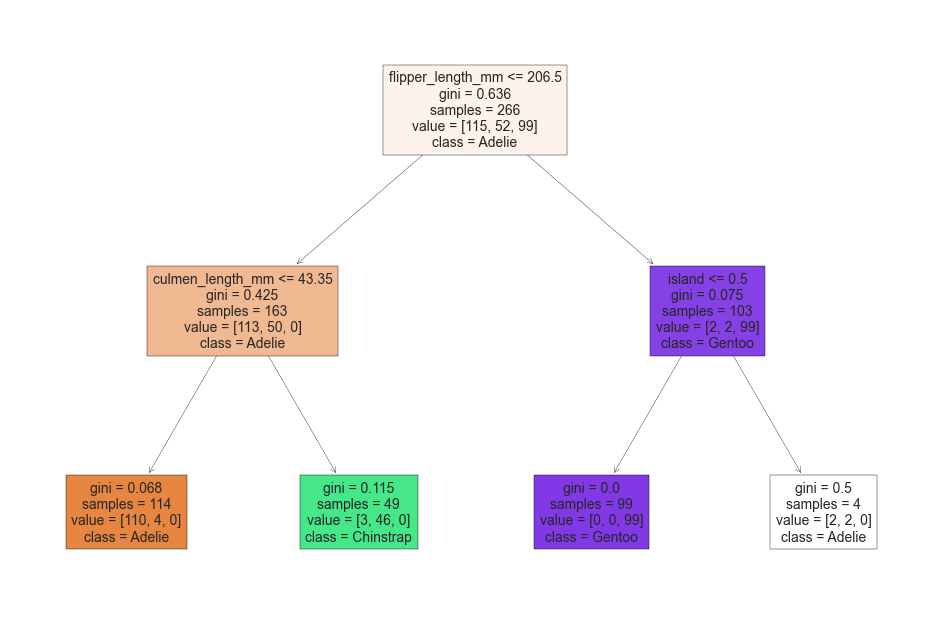

In [128]:
report_model(pruned_tree)

### Max Leaf Nodes

In [129]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree_2 = Pipeline(steps=operations)
pruned_tree_2.fit(X_train,y_train)
#bölünmeden kalan toplam yapraklarin toplam sayisi

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_leaf_nodes=7, random_state=101))])



Test Set
[[30  1  0]
 [ 2 14  0]
 [ 1  0 19]]


              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        31
   Chinstrap       0.93      0.88      0.90        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.94        67
   macro avg       0.95      0.93      0.94        67
weighted avg       0.94      0.94      0.94        67



Train Set
[[115   0   0]
 [  4  48   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98       115
   Chinstrap       1.00      0.92      0.96        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.98       266
   macro avg       0.99      0.97      0.98       266
weighted avg       0.99      0.98      0.98       266



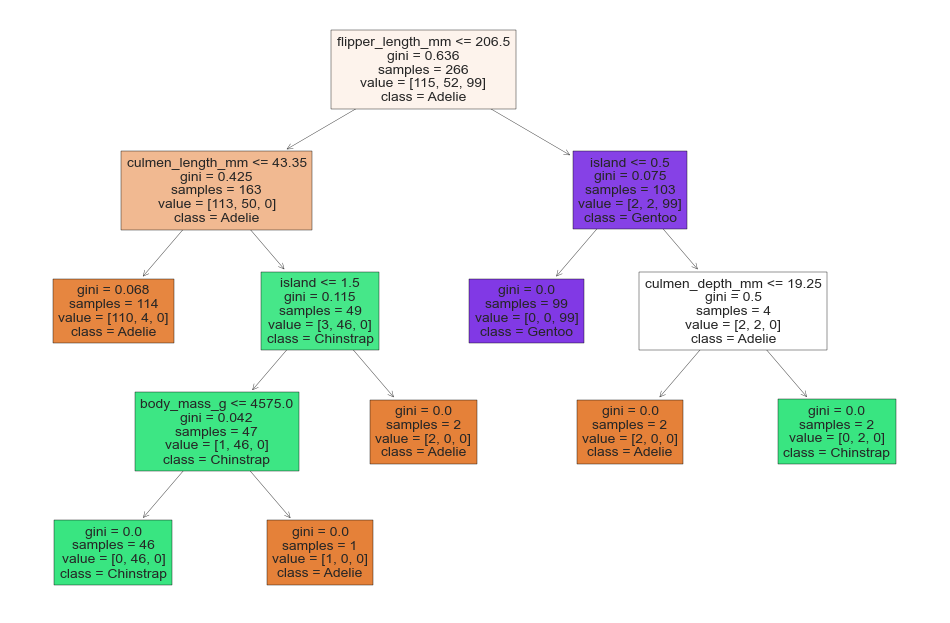

In [75]:
report_model(pruned_tree_2)

In [ ]:
#ok cikmayan yerler 7 tane, büyük datalarda bunu pek kullanamayiz

## Criterion

In [ ]:
#entropy ya da gini ye göre bölme islemi yaptiracagim
#0 a ne kadar yaklasirsa pure olur, classlarim cok iyi ayrismistir
#entropy nin maliyeti fazla o yüzden default gini, gini daha hizli calisir

In [130]:
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=101)
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

entropy_tree = Pipeline(steps=operations)

entropy_tree.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(criterion='entropy',
                                        random_state=101))])



Test Set
[[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]


              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



Train Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



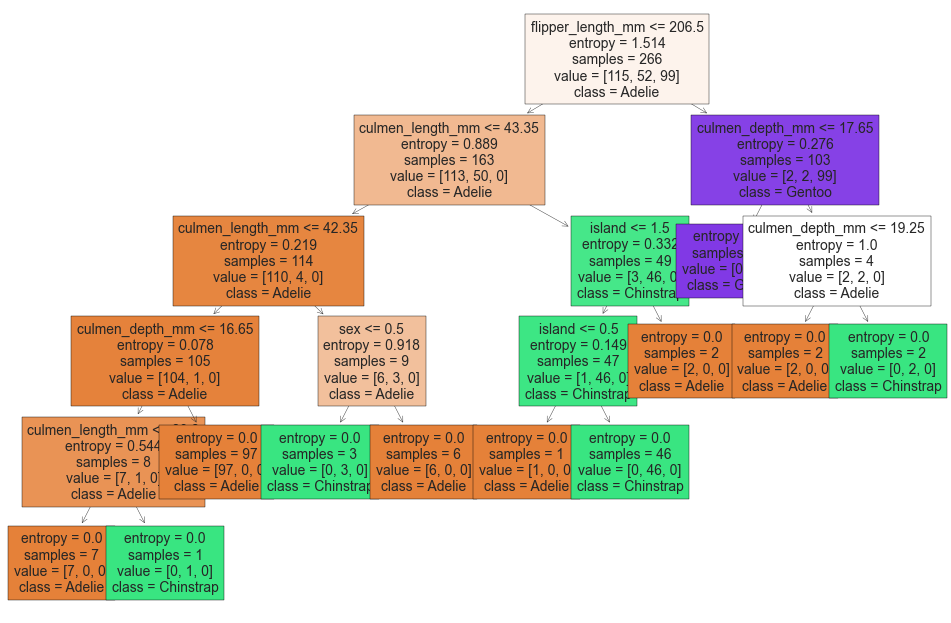

In [131]:
report_model(entropy_tree)

In [ ]:
#entropy düzensizlik demekti düzensizligi 0 lamis

## Max_features, Splitter

In [132]:
DT_model = DecisionTreeClassifier(splitter = "random", max_features=3)  #splitter default u best tir,her seferinde en önemli feature bakar
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]  #random olunca tüm featureleri rasgele secer, bunlar icinden yine random secer
                                                                        #max feature 3 olunca rasgele 3 feature secer,splitter best olunca ,hangisi en iyise onu secer
                                                                        #bunlarla over fitting ayarlaniyor
tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_features=3, splitter='random'))])



Test Set
[[27  3  1]
 [ 1 14  1]
 [ 0  0 20]]


              precision    recall  f1-score   support

      Adelie       0.96      0.87      0.92        31
   Chinstrap       0.82      0.88      0.85        16
      Gentoo       0.91      1.00      0.95        20

    accuracy                           0.91        67
   macro avg       0.90      0.92      0.91        67
weighted avg       0.91      0.91      0.91        67



Train Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



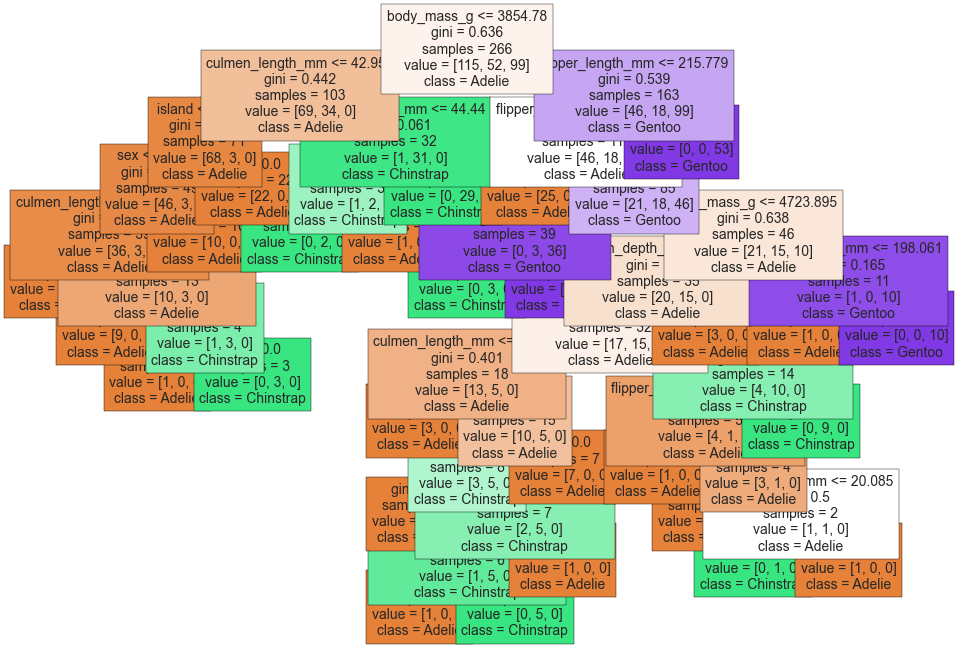

In [134]:
report_model(tree)

In [ ]:
#en önemli parametre max_depth sonraki max_feature

## Find Best Parameters

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

In [82]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],  #max featurede modeldeki feature den fazla sayi yazma
              "DT_model__max_depth": [None, 2, 3, 4, 5],    #grid search ta deger verirken kontrol etmek gerek,
                                                             #train set ile test seti arasindaki aralik cok olmamali,
                                                             # #her araligi belirlerken sonucu kontrol et
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [83]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [84]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4, 5],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_micro')

In [85]:
grid_model.best_index_  #en iyi sonucu 12. index te elde etmisim

12

In [86]:
pd.DataFrame(grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.988889
mean_train_score    0.992901
Name: 12, dtype: object

In [87]:
grid_model.best_score_

0.9888888888888889

In [88]:
grid_model.best_params_       #en iyi sonucu aldigim parametreleri döndürür

{'DT_model__max_depth': None,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 9,
 'DT_model__splitter': 'best'}

In [89]:
grid_model.best_estimator_   #defaulttan farkli olanlari döndürür

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

In [90]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)  #grid search sonrasi da ulasilacak en iyi skorlara ulasmis

Test_Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train_Set
[[114   1   0]
 [  1  51   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       115
   Chinstrap       0.98      0.98      0.98        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266



In [91]:
operations = [("OneHotEncoder", column_trans), ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))]

scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.988889
train_accuracy           0.992901
test_precision_micro     0.988889
train_precision_micro    0.992901
test_recall_micro        0.988889
train_recall_micro       0.992901
test_f1_micro            0.988889
train_f1_micro           0.992901
dtype: float64

## Final Model

In [92]:
X = df.drop(columns=["species", "flipper_length_mm"])  #en güclü featureyi düsürdüm, target i düsürdüm
y = df['species']

In [93]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))]

pipe_final_model = Pipeline(steps=operations)

pipe_final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

In [94]:
X.head()

,island,culmen_length_mm,culmen_depth_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,3750.0,MALE
1,Torgersen,39.5,17.4,3800.0,FEMALE
2,Torgersen,40.3,18.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,3450.0,FEMALE
5,Torgersen,39.3,20.6,3650.0,MALE


In [95]:
pd.DataFrame(column_trans.fit_transform(X))

,0,1,2,3,4
0,2.0,1.0,39.1,18.7,3750.0
1,2.0,0.0,39.5,17.4,3800.0
2,2.0,0.0,40.3,18.0,3250.0
3,2.0,0.0,36.7,19.3,3450.0
4,2.0,1.0,39.3,20.6,3650.0
...,...,...,...,...,...
328,0.0,0.0,47.2,13.7,4925.0
329,0.0,0.0,46.8,14.3,4850.0
330,0.0,1.0,50.4,15.7,5750.0
331,0.0,0.0,45.2,14.8,5200.0


## Prediction

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [97]:
samples = {"island": ["Torgersen", "Biscoe"], #ayni featurelerin sirasini degistirsek bile column_transform onu tespit edr
           "culmen_length_mm": [39, 48],
           "culmen_depth_mm":[18,14],
           #'flipper_length_mm':[180, 214],   #bunu düsürmüstük,ama yanlislikla yazsak bile model sadece feature selectionda kullanilanlari alir
           'body_mass_g': [3700,4900],
           "sex":["MALE","FEMALE"]}

In [98]:
df_samples = pd.DataFrame(samples)
df_samples

,island,culmen_length_mm,culmen_depth_mm,body_mass_g,sex
0,Torgersen,39,18,3700,MALE
1,Biscoe,48,14,4900,FEMALE


In [99]:
pd.DataFrame(column_trans.transform(df_samples))

,0,1,2,3,4
0,2.0,1.0,39.0,18.0,3700.0
1,0.0,0.0,48.0,14.0,4900.0


In [100]:
pipe_final_model.predict(df_samples)

array(['Adelie', 'Gentoo'], dtype=object)